Test manager of root functionality

In [14]:

import sys
from pathlib import Path
import seaborn as sns

In [2]:
LCL_PATH = str(Path().cwd().parent)
LCL_PATH

'/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura/laborator_1/GeneticAlgoritmMethods'

In [3]:

# adding local_folder to the system path
sys.path.append(LCL_PATH)

def remove_modules(modules_name, *arg):
    if (modules_name in sys.modules):
        del sys.modules[modules_name]
        for key in arg:
            tmp_modules = "{}.{}".format(modules_name, key)
            del sys.modules[tmp_modules]

In [4]:
remove_modules("my_code.algoritm_genetic")
remove_modules("my_test.algoritm_genetic")
remove_modules("my_code.callback")
remove_modules("my_test.callback")
remove_modules("my_code.crossover")
remove_modules("my_test.crossover")
remove_modules("my_code.fitness")
remove_modules("my_test.fitness")
remove_modules("my_code.population")
remove_modules("my_test.population")
remove_modules("my_code.init_population")
remove_modules("my_test.init_population")
remove_modules("my_code.metrics")
remove_modules("my_test.metrics")
remove_modules("my_code.mutate")
remove_modules("my_test.mutate")
remove_modules("my_code.root_GA")
remove_modules("my_test.root_GA")
remove_modules("my_code.select_parent")
remove_modules("my_test.select_parent")

from my_code.algoritm_genetic import *
from my_test.algoritm_genetic import *
from my_code.callback import *
from my_test.callback import *
from my_code.crossover import *
from my_test.crossover import *
from my_code.fitness import *
from my_test.fitness import *
from my_code.genoms import *
from my_test.genoms import *
from my_code.init_population import *
from my_test.init_population import *
from my_code.metrics import *
from my_test.metrics import *
from my_code.mutate import *
from my_test.mutate import *
from my_code.root_GA import *
from my_test.root_GA import *
from my_code.select_parent import *
from my_test.select_parent import *

In [ ]:
GeneticAlgorithm().help()

# Test Genoms

In [ ]:

genoms_obj = Genoms(size=10, tsp=(0, 20), kp=(0., 2.))
genoms_obj.shape

In [ ]:

tsp_arr = np.arange(10)
kp_arr  = np.arange(10) % 2
for _ in range(5):
    genoms_obj.add(tsp=tsp_arr, kp=kp_arr)
genoms_obj.save()

In [ ]:
tmp_genoms = genoms_obj[0]
print(tmp_genoms)

In [ ]:

tmp_genoms["tsp"] = np.arange(10) % 3
tmp_genoms["kp"] = np.ones(10)
genoms_obj[[0, 1]] = tmp_genoms
print(genoms_obj)

In [ ]:

genoms_obj.shape

In [ ]:

for _ in range(5000):
    tsp_arr = np.random.permutation(np.arange(10))
    kp_arr  = np.arange(10) % 2
    gene = genoms_obj.concat([tsp_arr, kp_arr])
    genoms_obj.append(gene)
genoms_obj.save()
print(genoms_obj)

In [ ]:

genoms_obj = Genoms(size=10, tsp=(0, 280))
print(genoms_obj.shape)

for _ in range(1000):
    tsp_arr = np.random.permutation(np.arange(10))
    gene = genoms_obj.concat([tsp_arr])
    genoms_obj.append(gene)
genoms_obj.save()
population = genoms_obj.population("tsp")
print(genoms_obj.shape)
population

In [ ]:

np.apply_along_axis(lambda individ: print(individ.shape),
                                        axis=1,
                                        arr=genoms_obj)

# Test methods Mutate

In [ ]:
obj_mutate = Mutate("")
obj_mutate(None, None, None)

In [ ]:
obj_mutate = Mutate("swap")
obj_mutate(None, None, None)

In [ ]:
test_mutate = TestMutate("inversion")
test_mutate.test("inversion")
print(test_mutate.GENOME_LENGTH)
print(test_mutate.MUTATION_RATE)

In [ ]:

print(test_mutate.MUTATION_RATE)
print(obj_mutate.MUTATION_RATE)
test_mutate.MUTATION_RATE=0.01
print(test_mutate.MUTATION_RATE)
print(obj_mutate.MUTATION_RATE)

# Test crossover

In [ ]:
obj_crossover = Crossover(mutate="")
obj_crossover(None, None)

In [ ]:
obj_crossover = Crossover(crossover="")
obj_crossover(None, None)

In [ ]:
from laborator_1.GeneticAlgoritmMethods.my_test.crossover import TestCrossover

obj_crossover = TestCrossover("diff")
obj_crossover.test("diff")

In [ ]:

print(obj_crossover.MUTATION_RATE)

# Test other

### init

In [ ]:
map_generator = TTPGenerator(nbr_city=9, max_distance=300)
map_of_distance = map_generator()
map_of_distance

In [ ]:
tsp = TSP()
tsp.setParameters(
    POPULATION_SIZE = 20,  # numarul populatiei
    MUTATION_RATE   = 0.01,   # threshold-ul pentru a face o mutatie genetica
    CROSSOVER_RATE  = 0.5,   # threshold-ul pentru incrucisarea parintilor
    SELECT_RATE     = 0.7,   # threshold-ul de selectie, selectare dupa compatibilitate sau dupa probabilitate
    K_DISTANCE      = 1.0,   # coeficientul de inhibare a distantei
    K_NBR_CITY      = 0.9,   # coeficientul de inhibare a numarului de orase
    GENERATIONS     = 100,   # numarul de generatii
    K_BEST          = 15,     # salveaza pentru urmatoarea generatie numarul de indivizi, cu cel mai mare scor
    K_WRONG         = 5,     # salveaza pentru urmatoarea generatie numarul de indivizi, cu cel mai mic scor
    )
tsp.setMap(map_of_distance)
test_tsp = TestTSP(tsp)

### Algotrithm Genetic Test

In [ ]:
print("\n=== Test GeneticAlgorithm ===")
t = TestGeneticAlgorithm()

t.test_run()
t.test_help()
t.test_setParameters()
t.test_evolutionMonitor()
t.test_showMetrics()
t.test_stres()
t.test_getArgsWeaks()
t.test_getArgsElite()
t.test_setElites()
t.test_setElitesByFitness()
t.test_setDataset()

### Callback test

In [ ]:
print("\n=== Test Callback ===")
TestCallback("log_test.csv").test()

### Crossover Test

In [ ]:
t = TestCrossover()

t.test_diff()
t.test_split()
t.test_perm_sim()
t.test_flip_sim()
t.test_mixt()


### Fitness Test

In [ ]:
tf = TestFitness()

tf.test_TSP_f1()
tf.test_TTP_linear()
tf.test_TTP_exp()

### Individ repair test

In [ ]:
#TO DO

### Init Population Test

In [ ]:
t = TestInitPopulation()
t.test_help()
t.test_abstract()
t.test_TSP_random()
t.test_init_TTP()


In [ ]:

t = InitPopulation("TSP_rand", None)

In [ ]:
population = t(10)
print(population)

In [ ]:

print(population["tsp"])

### Metrics Test

In [ ]:
t = TestMetrics()
t.test_help()

# TSP tests
t.test_metricsTSP()
t.test_scoreTSP()

# TTP tests
t.test_metricsTTP()
t.test_speedTTP()
t.test_scoreTTP()

### Mutate Test

In [ ]:
t = TestMutate("")

t.test_swap()
t.test_scramble()
t.test_inversion()
t.test_roll()
t.test_insertion()
t.test_diff_swap()
t.test_roll_sim()
t.test_perm_sim()
t.test_flip_sim()
t.test_mixt()


### Root GA Test

In [ ]:
t = TestRootGA()
t.GENOME_LENGTH   = 8
t.POPULATION_SIZE = 5

pop = t.initPopulation()
print(pop)

### Select Parent Test

In [7]:
obj = SelectParent("choice")

In [8]:
obj.POPULATION_SIZE

100

In [10]:

fitness_value = np.arange(obj.POPULATION_SIZE)
obj.startEpoch(fitness_value)

<Axes: >

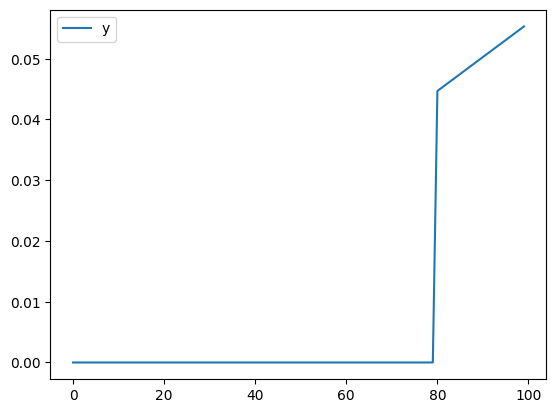

In [20]:

data = {"y":obj.fitness_values}
sns.lineplot(data=data)

<Axes: ylabel='Count'>

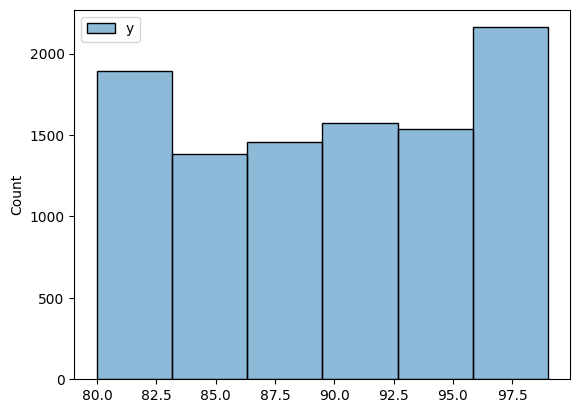

In [15]:

tmp = []
for _ in range(10000):
    arg = obj.selectParentChoice()
    tmp.append(arg)

data = {"y":np.array(tmp)}
sns.histplot(data=data, binwidth=3)

<Axes: ylabel='Count'>

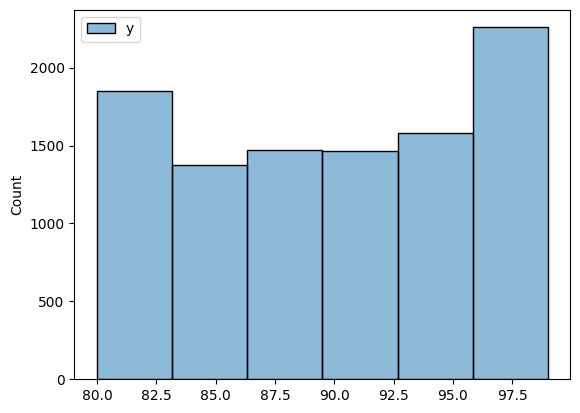

In [16]:

tmp = []
for _ in range(10000):
    arg = obj.selectParentWheel()
    tmp.append(arg)

data = {"y":np.array(tmp)}
sns.histplot(data=data, binwidth=3)

<Axes: ylabel='Count'>

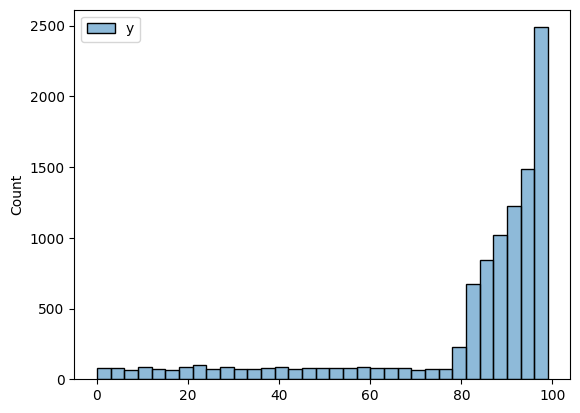

In [17]:

tmp = []
for _ in range(10000):
    arg = obj.selectParentTour()
    tmp.append(arg)

data = {"y":np.array(tmp)}
sns.histplot(data=data, binwidth=3)

<Axes: ylabel='Count'>

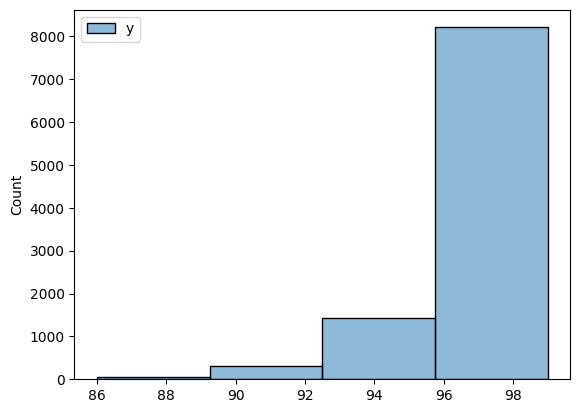

In [18]:

tmp = []
for _ in range(10000):
    arg = obj.selectParentTourChoice()
    tmp.append(arg)

data = {"y":np.array(tmp)}
sns.histplot(data=data, binwidth=3)

<Axes: ylabel='Count'>

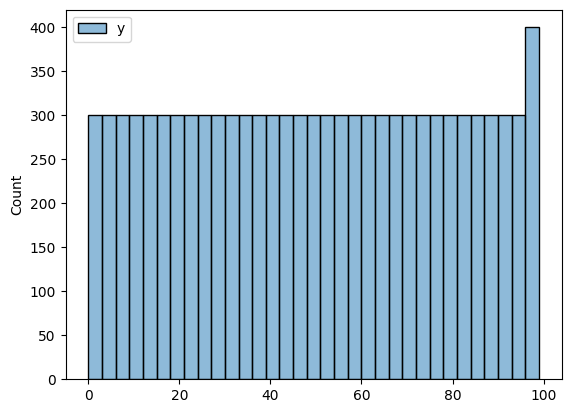

In [19]:

tmp = []
for _ in range(10000):
    arg = obj.selectParentRise()
    tmp.append(arg)

data = {"y":np.array(tmp)}
sns.histplot(data=data, binwidth=3)

In [21]:
t = TestSelectParent()

t.test_choice()
t.test_roata()
t.test_turneu()
t.test_turneu_choice()
t.test_crescator()
t.test_mixt()


=== choice ===


AttributeError: 'SelectParent' object has no attribute 'setConfig'